In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def get_result_df(file_name):
    with open(file_name, 'r') as f:
        all_logs = f.readlines() 
    
    method_list = []
    dataset_list = []
    lr_list = []
    epochs_list = []
    hidden_list = []
    dropout_list = []
    weight_decay_list = []
    # alpha_list = []
    # beta_list = []
    # gamma_list = []
    norm_func_id_list = []
    # norm_layers_list = []
    orders_func_id_list = []
    # orders_list = []
    highest_train_list = []
    highest_valid_list = []
    final_train_list = []
    final_test_list = []
    # delta_list = []
    final_test_std_list = []
    num_layers_list = []
    run_epoch_result_list = []


    dataset_tag = False
    final_test_tag = False



    for logs in all_logs:
        if 'Namespace' in logs:
            if dataset_tag == True and final_test_tag == False:
                highest_train_list.append('0')
                highest_valid_list.append('0')
                final_train_list.append('0')
                final_test_list.append('0')
                final_test_std_list.append('0')
                run_epoch_result_list.append({'epoch': [], 'result': [], 'time': []})       

            now_epoch = []
            now_result = []
            now_time = []
            

            method_list.extend(re.findall(r"method='(.*?)', no_bn", logs))
            dataset_list.extend(re.findall(r"dataset='(.*?)', decay_rate", logs))
            # delta_list.extend(re.findall(r"delta=(.*?), directed", logs))
            lr_list.extend(re.findall(r"lr=(.*?), method", logs))
            epochs_list.extend(re.findall(r"epochs=(.*?), exponent", logs))
            dropout_list.extend(re.findall(r"dropout=(.*?), epochs", logs))
            weight_decay_list.extend(re.findall(r"weight_decay=(.*?)\)", logs))
            # alpha_list.extend(re.findall(r"alpha=(.*?), beta", logs))
            # beta_list.extend(re.findall(r"beta=(.*?), cached", logs))
            orders_func_id_list.extend(re.findall(r"orders_func_id=(.*?), print_prop", logs))
            # orders_list.extend(re.findall(r"orders=(.*?), orders_func_id", logs))
            # gamma_list.extend(re.findall(r"gamma=(.*?), gat_heads", logs))
            norm_func_id_list.extend(re.findall(r"norm_func_id=(.*?), norm_layers", logs))
            # norm_layers_list.extend(re.findall(r"norm_layers=(.*?), num_layers", logs))
            hidden_list.extend(re.findall(r"hidden_channels=(.*?), hops", logs))
            num_layers_list.extend(re.findall(r"num_layers=(.*?), num_mlp_layers", logs))


            dataset_tag = True
            final_test_tag = False
        
        if 'Epoch' in logs and 'Valid' in logs and 'Time' in logs:
            now_epoch.extend(re.findall(r"Epoch: (.*?), Loss", logs))
            now_result.extend(re.findall(r"Valid: (.*?)%, Test", logs))
            now_time.extend(re.findall(r"Time: (.*?)\n", logs))

            
        if 'Highest Train' in logs and ',' in logs:
            highest_train_list.extend(re.findall(r"Highest Train: (.*?),", logs))
        
        if 'Highest Valid' in logs and ',' in logs:
            highest_valid_list.extend(re.findall(r"Highest Valid: (.*?),", logs))
            
        if 'Final Train' in logs and ',' in logs:
            final_train_list.extend(re.findall(r"Final Train: (.*?),", logs))
            
        if 'Final Test' in logs and ',' in logs:
            final_test_list.extend(re.findall(r"Final Test: (.*?),", logs))
            final_test_std_list.extend(re.findall(r", (.*?)\n", logs))

            now_epoch = [int(e) for e in now_epoch]
            now_result = [float(r) for r in now_result]
            now_time = [float(t[0:6]) for t in now_time]
            now_time = [sum(now_time[:i+1]) for i in range(len(now_time))]        

            run_epoch_result_list.append({'epoch': now_epoch, 'result': now_result, 'time': now_time})

            final_test_tag = True
            dataset_tag = False


    if dataset_tag == True and final_test_tag == False:
            highest_train_list.append('0')
            highest_valid_list.append('0')
            final_train_list.append('0')
            final_test_list.append('0')
            final_test_std_list.append('0')
            run_epoch_result_list.append({'epoch': [], 'result': [], 'time': []})       
    
    
    

    d = {
        'method': method_list,
        'dataset': dataset_list,
        'lr': lr_list,
        'epoch': epochs_list,
        'hidden': hidden_list,
        'num_layers': num_layers_list,
        'dropout': dropout_list,
        'weight_decay': weight_decay_list,
        # 'alpha': alpha_list,
        # 'beta': beta_list,
        # 'gamma': gamma_list,
        # 'delta': delta_list,
        # 'norm_layers': norm_layers_list,
        # 'orders': orders_list,
        'norm_func_id': norm_func_id_list,
        'order_func_id': orders_func_id_list,
        'high_train': highest_train_list,
        'high_valid': highest_valid_list,
        'final_train': final_train_list,
        'final_test': final_test_list,
        'final_std_test': final_test_std_list,
        'run_epoch_result': run_epoch_result_list
    }

    # for k, v in d.items():
    #     print(k, len(v))

    # csv_name = 'results/large_dataset_tuning14.csv'
    df = pd.DataFrame.from_dict(d)
    df = df.sort_values(['method', 'dataset', 'final_test']).reset_index(drop=True)
    # if os.path.exists(csv_name):
    #     df.to_csv(csv_name, mode='a', header=False)
    # else:
    #     df.to_csv(csv_name)
    return df
    
        

In [3]:
path = 'efficiency_logs/'
files = os.listdir(path)

df_list = []
for file in files:
    df_list.append(get_result_df(file_name=path+file))

# get_result_df(file_name='log1229_13_twitch.txt')

In [4]:
all_df = pd.concat(df_list).reset_index(drop=True)

In [5]:
best_results = [
     ['gprgnn', 'arxiv-year', 44.96],
     ['gprgnn', 'genius', 89.91],
     ['gprgnn', 'pokec', 78.85],
     ['gprgnn', 'fb100', 81.04],
     ['gprgnn', 'twitch-gamer', 61.95],
     ['gprgnn', 'snap-patents', 40.94],
     ['linkx', 'arxiv-year', 54.27],
     ['linkx', 'genius', 90.50],
     ['linkx', 'pokec', 81.97],
     ['linkx', 'fb100', 84.49],
     ['linkx', 'twitch-gamer', 65.92],
     ['linkx', 'snap-patents', 62.10],
     ['h2gcn', 'arxiv-year', 49.18],
     ['h2gcn', 'fb100', 81.31],
     ['mlpnorm'],
     ['acmgcn']
 ]

In [6]:
best_results_index = []
for b in best_results:
    if len(b) == 3:
        t = str(b[2])
        if len(t) < 5:
            t = t + '0'
        index = all_df.index[(all_df.method == b[0]) & (all_df.dataset == b[1]) & (all_df.final_test == t)].to_list()
    if len(b) == 1:
        index = all_df.index[all_df.method == b[0]].to_list()
    best_results_index.extend(index)
len(best_results_index)

32

In [7]:
best_results_df = all_df.iloc[best_results_index]

In [8]:
best_results_df = best_results_df.reset_index(drop=True)

In [9]:
for i in range(len(best_results_df)):
    if best_results_df['method'][i] == 'mlpnorm' and best_results_df['norm_func_id'][i] == str(1):
        best_results_df['method'][i] = 'GloGNN'
    if best_results_df['method'][i] == 'mlpnorm' and best_results_df['norm_func_id'][i] == str(2):
        best_results_df['method'][i] = 'GloGNN++'
    

In [10]:
best_results_df

,method,dataset,lr,epoch,hidden,num_layers,dropout,weight_decay,norm_func_id,order_func_id,high_train,high_valid,final_train,final_test,final_std_test,run_epoch_result
0,gprgnn,arxiv-year,0.01,500,256,2,0.5,0.001,2,2,48.58,45.17,48.48,44.96,0.12,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."
1,gprgnn,genius,0.002,500,256,2,0.5,0.001,2,2,89.94,89.92,89.94,89.91,0.33,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."
2,gprgnn,pokec,0.01,500,256,2,0.5,0.001,2,2,78.88,78.86,78.88,78.85,0.04,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."
3,gprgnn,fb100,0.05,500,16,2,0.5,0.001,2,2,99.59,81.40,97.11,81.04,0.35,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."
4,gprgnn,twitch-gamer,0.01,500,256,2,0.5,0.001,2,2,62.28,62.41,62.22,61.95,0.29,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."
5,gprgnn,snap-patents,0.01,500,256,2,0.5,0.001,2,2,41.19,40.96,41.19,40.94,0.05,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."
6,linkx,arxiv-year,0.01,500,128,1,0.5,0.001,2,2,94.93,54.20,80.28,54.27,0.38,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."
7,linkx,genius,0.01,500,256,3,0.5,0.001,2,2,95.25,90.51,94.35,90.50,0.15,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."
8,linkx,pokec,0.01,500,256,1,0.5,0.001,2,2,99.91,81.94,96.39,81.97,0.16,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."
9,linkx,fb100,0.01,500,256,1,0.5,0.001,2,2,100.00,84.68,98.76,84.49,0.44,"{'epoch': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1..."


In [11]:
datasets = best_results_df['dataset'].unique()

In [12]:
datasets

array(['arxiv-year', 'genius', 'pokec', 'fb100', 'twitch-gamer',
       'snap-patents'], dtype=object)

In [57]:
d = datasets[0]
d

'arxiv-year'

In [58]:
models = ['gprgnn', 'h2gcn', 'acmgcn', 'linkx', 'GloGNN', 'GloGNN++']
# models = ['gprgnn', 'acmgcn', 'linkx', 'GloGNN', 'GloGNN++']

In [15]:
model_color_dict = {
    'gprgnn': 'black',
    'linkx': '#377eb8',
    'h2gcn': '#4daf4a',
    'GloGNN': '#984ea3',
    'GloGNN++': 'red',
    'acmgcn': '#a65628'
}

model_name_dict = {
    'gprgnn': 'GPR-GNN',
    'linkx': 'LINKX',
    'h2gcn': 'H2GCN',
    'GloGNN': 'GloGNN',
    'GloGNN++': 'GloGNN++',
    'acmgcn': 'ACM-GCN'
}

model_dash_dict = {
    'gprgnn': (5,2),
    'linkx': (2,5),
    'h2gcn': (4,10),
    'GloGNN': (3,3,2,2),
    'GloGNN++': (5,2,20,2),
    'acmgcn': (10, 5, 20, 5)
}

model_marker_dict = {
    'gprgnn': '',
    'linkx': '',
    'h2gcn': '',
    'GloGNN': '',
    'GloGNN++': 'o',
    'acmgcn': '*'
}

model_lw_dict = {
    'gprgnn': 1,
    'linkx': 1,
    'h2gcn': 1,
    'GloGNN': 2,
    'GloGNN++': 2,
    'acmgcn': 1
}



model_ls_dict = {
    'gprgnn': '-',
    'linkx': ':',
    'h2gcn': '-.',
    'GloGNN': '--',
    'GloGNN++': '-.',
    'acmgcn': '--'
}


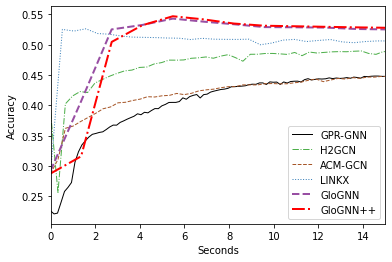

In [59]:
plt.figure()
# plt.title(d)

# fig, ax = plt.subplots()
    # plt.xlim(0, args.epochs)
plt.xlim(0, 15)
# plt.ylim(0, 1)

arxiv_list = [1, 1, 1, 1, 1, 1]


for i in range(len(models)):
    model = models[i]
    run_epoch_result = best_results_df[(best_results_df.method == model) & (best_results_df.dataset==d)]['run_epoch_result'].iloc[0]
    epoch = run_epoch_result['epoch']
    result = run_epoch_result['result']
    result = [r/100 for r in result]
    time = run_epoch_result['time']

    width = 5
    seed = 2

    # arxiv l 15 w 5 s 2
    # genius l 60 w 5 s 4
    # fb100 l 50 w 5 s 4
    # pokec l 200 w 1 s 4
    # twitch l 100 w 1 s 4
    # snap

    epoch = [epoch[i] for i in range(500*seed, 500*seed+500, width)]
    result = [result[i] for i in range(500*seed, 500*seed+500, width)]
    time = [time[i] for i in range(500*seed, 500*seed+500, width)]

    time = [t-time[0] for t in time]

    # print(model)
    # print(result)
    # print(time)


    plt.plot(time, result, model_color_dict[model], label=model_name_dict[model],
         linestyle=model_ls_dict[model], linewidth=model_lw_dict[model])

# fig, ax = plt.subplots()
plt.ylabel('Accuracy')
# plt.xlabel('epoches')
plt.xlabel('Seconds')
plt.legend(loc='lower right')
plt.savefig('{}/{}_valid.pdf'.format('efficiency_plots', d))
plt.show()